
## Demo for pyAPES_MLM with isotope ($\delta^{13}C$, $\delta^{18}O$) add-on

- Leaf-level isotope model (see Leppä et al., 2022) uses outputs of photo-model for sunlit and shaded leaves for each planttype to solve $\delta^{13}C$ of leaf sugar pool and $\delta^{18}O$ of leaf water and leaf sugar pools.
- Plant-level isotope model (see Sjezner & Leppä et al., in prep) uses outputs od leaf-level isotope model and photo-model to calculate inputs to plant-level carbon pool and tracks the isotopic signals from there to intra-annual tree ring cellulose of given woodsections for each plant-type.

### Import modules

In [1]:
from pyAPES.utils.iotools import read_forcing
from pyAPES.pyAPES_MLM import driver

import pandas as pd

### Read model parameter dictionaries
- general parameters, canopy parameters, soil parameters and parameters of isotope model ($\delta^{13}C$, $\delta^{18}O$)
- for overview of isotope model parameters see below (for now no planttype-specific parameters can be defined)

In [2]:
from pyAPES.parameters.mlm_parameters import gpara, cpara, spara, isopara

isopara

{'d13C': {'solve': True,
  'a_b': 0.0029,
  'a_s': 0.0044,
  'a_m': 0.0018,
  'b': 0.029,
  'e': -0.006,
  'f': 0.008,
  'e_stem': 0.0,
  'x': 0.0,
  'init_d13C_leaf': -32.0,
  'init_d13C_C_pool': -32.0},
 'd18O': {'solve': True,
  'e_kb': 0.019,
  'e_k': 0.028,
  'e_wc': {'constant': False, 'value': 0.027},
  'nonsteadystate': True,
  'Vlw': 10.0,
  'peclet': False,
  'L_eff': 0.06,
  'f1': 1.0,
  'pex': 0.36,
  'init_d18O_leaf': 24.0,
  'init_d18O_C_pool': 24.0},
 'C_leaf': 392000.0,
 'init_C_pool': 1000000.0,
 'k_pool': 9.512937595129376e-07,
 'woodsections_filename': 'forcing/Hyytiala/woodsections.dat'}

The file [woodsections.dat](forcing/Hyytiala/woodsections.dat) includes information (**date_formation** and **date_maturation**) of time period corresponding to formation periods of wood sections of interest, e.g. intra-annual wood sections which $\delta^{13}C$ and $\delta^{18}O$ has been measured. Here these are defined from CASSIA-model (Schiestl-Aalto et al., 2015) outputs for Hyytiälä. 

In [53]:
df = pd.read_csv('forcing/Hyytiala/woodsections.dat', header='infer', sep=';')
df.head(5)

,site,tree,year,d18O,lower_limit,upper_limit,date_formation,date_maturation
0,Hyytiala,12,2010,21.7782,0.000000,0.090909,2010-05-14 00:00:00,2010-06-08 19:00:00
1,Hyytiala,12,2010,22.5484,0.090909,0.181818,2010-05-23 13:30:00,2010-06-19 19:30:00
2,Hyytiala,12,2010,22.5252,0.181818,0.272727,2010-05-29 15:00:00,2010-06-29 12:00:00
3,Hyytiala,12,2010,23.2512,0.272727,0.363636,2010-06-05 06:00:00,2010-07-08 19:00:00
4,Hyytiala,12,2010,22.4887,0.363636,0.454545,2010-06-11 09:00:00,2010-07-16 11:30:00


### Read forcing data and compile input for driver
- here forcing data includes also isotopic input data: $\delta^{13}C$ of atmospheric CO2 (Pallas-Sammaltunturi GAW-station; White et al., 2015) , $\delta^{18}O$ of water vapor (IsoGSM; Yoshimura et al., 2008), source water $\delta^{18}O$ (calculated using simple bucket model using IsoGSM $\delta^{18}O$ of precipitation, observed precipitation and root zone moisture; see Leppä et al., 2022).

In [4]:
forcing = read_forcing(
    forcing_file=gpara['forc_filename'],
    start_time=gpara['start_time'],
    end_time=gpara['end_time'],
    dt=gpara['dt'])

params = {
    'general': gpara,
    'canopy': cpara,
    'soil': spara,
    'isotopes': isopara,
    'forcing': forcing}

forcing[['d13Ca','d18Ov','d18O_sw']].head(5)

,d13Ca,d18Ov,d18O_sw
2015-05-01 00:00:00,-8.856783,-19.800416,-12.60404
2015-05-01 00:30:00,-8.856964,-19.641404,-12.60404
2015-05-01 01:00:00,-8.857145,-19.482392,-12.60404
2015-05-01 01:30:00,-8.857325,-19.323379,-12.60404
2015-05-01 02:00:00,-8.857506,-19.164367,-12.60404


### Run the model

In [5]:
resultfile, Model = driver(parameters=params,
                           create_ncf=True,
                           result_file= 'testrun.nc')

INFO pyAPES.pyAPES_MLM driver pyAPES_MLM simulation started. Number of simulations: 1
INFO pyAPES.soil.water __init__ Water balance in soil solved using: RICHARDS EQUATION & no lateral drainage
INFO pyAPES.soil.heat __init__ Soil heat balance solved.
INFO pyAPES.canopy.mlm_canopy __init__ Eflow: True, WMA: False, Ebal: True
INFO pyAPES.microclimate.radiation __init__ Shortwave radiation model: ZHAOQUALLS
INFO pyAPES.microclimate.radiation __init__ Longwave radiation model: ZHAOQUALLS
C:\Users\03110850\Git_repos\pyAPES_main\pyAPES\bottomlayer\organiclayer.py:1177: RuntimeWarning: invalid value encountered in scalar power
  Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m
INFO pyAPES.canopy.forestfloor __init__ Forestfloor has 1 bottomlayer types
INFO pyAPES.pyAPES_MLM driver Running simulation number (start time 2024-01-23 13:07): 0
INFO pyAPES.pyAPES_MLM run Running simulation 0


0%.. 

C:\Users\03110850\Git_repos\pyAPES_main\pyAPES\bottomlayer\organiclayer.py:1177: RuntimeWarning: invalid value encountered in scalar power
  Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m
C:\Users\03110850\Git_repos\pyAPES_main\pyAPES\bottomlayer\organiclayer.py:1114: RuntimeWarning: invalid value encountered in power
  relative_diffusivity = (np.power(Ta / 293.16, 1.75) * np.power(afp, 10.0/3.0) / porosity**2)


10%.. 20%.. 30%.. 40%.. 50%.. 60%.. 70%.. 80%.. 90%.. 

INFO pyAPES.pyAPES_MLM run Finished simulation 0, running time 614.66 seconds
INFO pyAPES.pyAPES_MLM driver Running time 614.66 seconds


100%


INFO pyAPES.pyAPES_MLM driver Ready! Results are in: results/testrun.nc


### Read results
- Isotope model outputs are given for leaf-level (sunlit/shaded) and plant-level, see below

In [44]:
from pyAPES.utils.iotools import read_results
import matplotlib.pyplot as plt

# read simulation results to xarray
results = read_results(resultfile)

results.data_vars

Data variables:
    canopy_z                          (canopy) float32 0.0 0.25 ... 24.75 25.0
    canopy_planttypes                 (planttype) object ...
    soil_z                            (soil) float32 -0.005 -0.015 ... -1.95
    forcing_d13Ca                     (date, simulation) float32 ...
    forcing_d18Ov                     (date, simulation) float32 ...
    forcing_d18O_sw                   (date, simulation) float32 ...
    pt_13c_discrimination_sunlit      (date, simulation, planttype, canopy) float32 ...
    pt_13c_discrimination_shaded      (date, simulation, planttype, canopy) float32 ...
    pt_d13c_net_co2_flux_sunlit       (date, simulation, planttype, canopy) float32 ...
    pt_d13c_net_co2_flux_shaded       (date, simulation, planttype, canopy) float32 ...
    pt_d13c_leaf_sugar_sunlit         (date, simulation, planttype, canopy) float32 ...
    pt_d13c_leaf_sugar_shaded         (date, simulation, planttype, canopy) float32 ...
    pt_d18o_leaf_water_sunlit   

### Plot results

**Figure 1** Vertical profiles of leaf isotopic signals in shaded and sunlit leaves for pines (planttype=0) at one timepoint

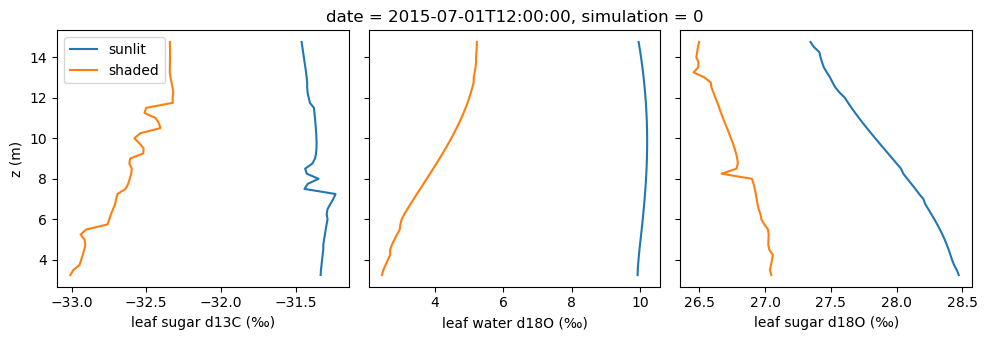

In [46]:
var = ['pt_d13c_leaf_sugar','pt_d18o_leaf_water','pt_d18o_leaf_sugar']

fig, ax = plt.subplots(1,3, figsize=(10,3.5), sharey='all')
for i, v in enumerate(var):
    results[v+'_sunlit'][2952,0,0,:].plot(y='canopy',ax=ax[i])
    results[v+'_shaded'][2952,0,0,:].plot(y='canopy',ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel(results[v+'_shaded'].attrs['units'].split(',')[0] + ' (‰)')
    if i != 1:
        ax[i].set_title('')
ax[0].set_ylabel('z (m)')
ax[0].legend(['sunlit', 'shaded'])
fig.tight_layout()

**Figure 2** Seasonal dynamics of plant isotopic signals for pines (leaf-level sunlit/shaded shown for leaves in upper capony)

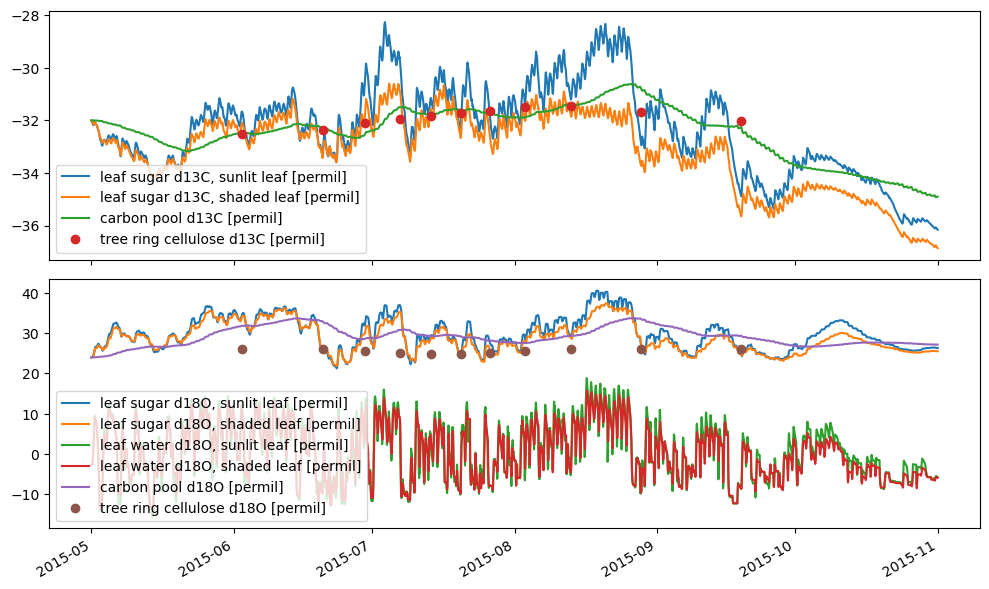

In [52]:
var = [['pt_d13c_leaf_sugar'],['pt_d18o_leaf_sugar','pt_d18o_leaf_water']]
var2 = ['pt_d13c_C_pool','pt_d18o_C_pool']
var3 = ['pt_d13c_treering_celluose','pt_d18o_treering_celluose']

fig, ax = plt.subplots(2,1, figsize=(10,6), sharex='all')
for i, vv in enumerate(var):
    for v in vv:
        results[v+'_sunlit'][:,0,0,50].plot(x='date',ax=ax[i],label=results[v+'_sunlit'].attrs['units'])
        results[v+'_shaded'][:,0,0,50].plot(x='date',ax=ax[i],label=results[v+'_shaded'].attrs['units'])
for i, v in enumerate(var2):
    results[v][:,0,0].plot(x='date',ax=ax[i],label=results[v].attrs['units'])
for i, v in enumerate(var3):
    results[v][:,0,0].plot(x='date',ax=ax[i],label=results[v].attrs['units'], marker='o', linestyle='')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title('')
    ax[i].legend(loc='lower left')
fig.tight_layout()